In [3]:
# !pip install google-generativeai>=0.8.3
!pip install python-dotenv

In [20]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from google import generativeai as genai
from IPython.display import HTML, Markdown, display
import PIL.Image

### Add the API Keys

In [6]:
# Load environment variables from the .env file
load_dotenv()

# Access a variable from the .env file
secret_key = os.getenv("GOOGLE_API_KEY")

# Pass the api to the genai library
genai.configure(api_key=secret_key)

### Run different Gemini model

In [42]:
for model in genai.list_models():
    print(model.name)
    # choose a vision model and print the documentations
    if model.name == 'models/gemini-1.5-flash':
        print(model)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
Model(name='models/gemini-1.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash',
      description='Fast and versatile multimodal model for scaling across diverse tasks',
      input_token_limit=1000000,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=40)
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-00

### Import the image

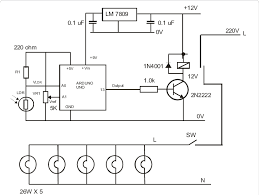

In [32]:

# Path to the image
# image_path = r"C:\Users\Abdulrahman A\AI-projects\VLMsExperiment\images (1).png"

# Display the image
img = PIL.Image.open("./images (1).png")
img = img.convert("RGB")
display(img)

### Image Data Processing

In [40]:
from io import BytesIO

# Save the image to a bytes object (in-memory binary stream)
img_bytes = BytesIO()
img.save(img_bytes, format="PNG")
img_bytes.seek(0)  # Rewind to the beginning of the stream

# Create the dictionary in the expected format for `Blob`
blob_data = {
    "mime_type": "image/png",
    "data": img_bytes.getvalue()  # Get the raw byte data of the image
}

### Specify the model

In [ ]:
model = genai.GenerativeModel(
    'models/gemini-1.5-flash',
    generation_config=genai.GenerationConfig(max_output_tokens=200))

# task_prompt = f"""You are an embedded IoT engineer. \
#                 Your task is to analyze the connections between the components in the image.
# """
response = model.generate_content(["Tell me about the image", blob_data])
Markdown(response.text)

The image shows a circuit diagram. The circuit is a 220V to 12V AC to DC converter with a bridge rectifier. 

The circuit has the following components:

* A 220 ohm resistor. 
* A 1N4001 diode. 
* A 1.0k resistor.
* A 2N2222 transistor.
* A LM7800 voltage regulator.
* Two 0.1 uF capacitors.
* Four light bulbs.
* A switch.

The circuit works by taking 220V AC from the mains and converting it to 12V DC using the voltage regulator and rectifier. The voltage regulator is a 7800 series device, and the rectifier is a bridge type. The circuit also includes a switch for turning the circuit on and off. The 2N2222 transistor is used to control the flow of